In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import tree
from sklearn import model_selection

In [3]:
iris=pd.read_csv('data/iris_flowers.csv')

In [4]:
iris['type']=(iris['class']=='Iris-virginica').astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [5]:
iris=iris.drop('class',axis=1)

In [6]:
iris

,sepallength,sepalwidth,petallength,petalwidth,type
0,6.0,2.2,5.0,1.5,1
1,5.1,2.5,3.0,1.1,0
2,5.0,2.3,3.3,1.0,0
3,7.7,3.8,6.7,2.2,1
4,5.8,4.0,1.2,0.2,0
...,...,...,...,...,...
145,6.3,3.3,4.7,1.6,0
146,5.2,4.1,1.5,0.1,0
147,4.9,3.1,1.5,0.1,0
148,4.6,3.1,1.5,0.2,0


In [7]:
X=iris.drop('type',axis=1)
y=iris['type']

In [8]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=42)

In [9]:
model=tree.DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

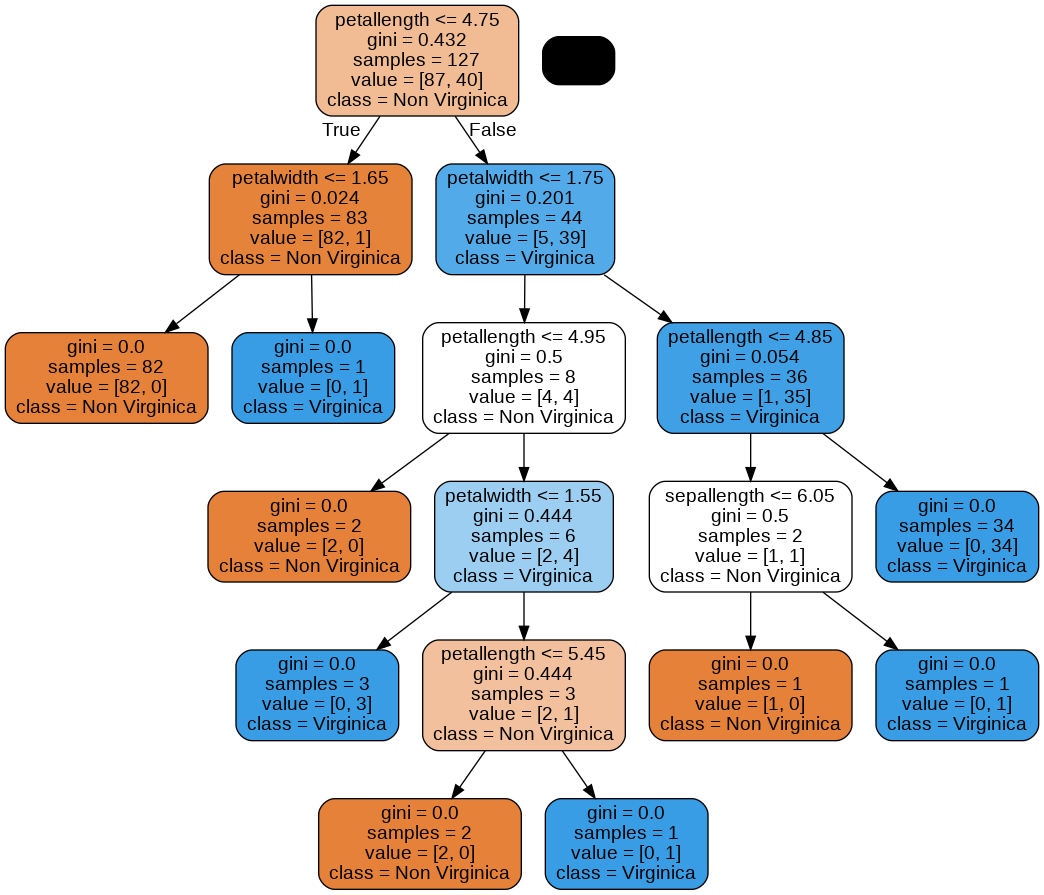

In [10]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
feature_names=X.columns,
class_names=['Non Virginica', "Virginica"])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [11]:
p0=87/127
p1=40/127

In [12]:
p0*(1-p0)+p1*(1-p1)

0.4315208630417261

In [13]:
Xtrain.shape

(127, 4)

In [14]:
left=Xtrain[Xtrain['petallength']<=4.75]
right=Xtrain[~(Xtrain['petallength']<=4.75)]

In [15]:
iris[:5]

,sepallength,sepalwidth,petallength,petalwidth,type
0,6.0,2.2,5.0,1.5,1
1,5.1,2.5,3.0,1.1,0
2,5.0,2.3,3.3,1.0,0
3,7.7,3.8,6.7,2.2,1
4,5.8,4.0,1.2,0.2,0


In [16]:
ytest[:5]

73     0
18     1
118    1
78     1
76     1
Name: type, dtype: int64

In [17]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import model_selection

In [18]:
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('data/heart_v2.csv')

In [21]:
df[:5]

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [22]:
# 1 - +ve - heart disease
# 0 - -ve - no disease

In [23]:
df.shape

(270, 5)

In [24]:
df['heart disease'].value_counts()/df.shape[0]

0    0.555556
1    0.444444
Name: heart disease, dtype: float64

In [25]:
p1=.44
p0=.56


In [26]:
giniroot =p0*(1-p0)+p1*(1-p1)

In [29]:
giniroot

0.4928

In [30]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [31]:
df[df['sex']==1]['heart disease'].value_counts()/df[df['sex']==1].shape[0]

1    0.546448
0    0.453552
Name: heart disease, dtype: float64

In [32]:
df[~(df['sex']==1)]['heart disease'].value_counts()/df[~(df['sex']==1)].shape[0]

0    0.770115
1    0.229885
Name: heart disease, dtype: float64

In [33]:
## left (sex=1)

In [34]:
p0=.453
p1=.546

In [35]:
ginileft =p0*(1-p0)+p1*(1-p1)

In [36]:
ginileft # .4957

0.495675

## right(sex=0)

In [37]:
p0=.77
p1=.23

In [38]:
giniright =p0*(1-p0)+p1*(1-p1)

In [39]:
giniright # .3542

0.35419999999999996

## combined gini (left & right)- weighted average

In [40]:
ginicombined=(183/270)*ginileft+(87/270)*giniright

In [41]:
ginicombined

0.4500886111111111

In [42]:
infogain=giniroot-ginicombined

In [43]:
infogain

0.042711388888888924

In [44]:
infogain=giniroot-ginicombined

In [45]:
infogain # .0427 for sex=1

0.042711388888888924

## cholestrol <= 250

### left

In [46]:
df[df['cholestrol']<=250]['heart disease'].value_counts()/df[df['cholestrol']<=250]['heart disease'].shape[0]

0    0.637584
1    0.362416
Name: heart disease, dtype: float64

In [47]:
p0=.64
p1=.36

In [48]:
ginileft =p0*(1-p0)+p1*(1-p1)

In [49]:
ginileft #.4608

0.4608

### right

In [50]:
df[ ~(df['cholestrol']<=250) ]['heart disease'].value_counts()/df[ ~(df['cholestrol']<=250) ]['heart disease'].shape[0]

1    0.545455
0    0.454545
Name: heart disease, dtype: float64

In [51]:
p0=.455
p1=.545

In [52]:
giniright=p0*(1-p0)+p1*(1-p1)

In [53]:
giniright

0.49595

## combined

In [54]:
df[df['cholestrol']<=250].shape[0]

149

In [55]:
df[ ~(df['cholestrol']<=250)  ].shape[0]

121

In [56]:
df.shape

(270, 5)

In [57]:
ginicombined=(149/270)*ginileft+(121/270)*giniright

In [58]:
ginicombined

0.47655240740740734

In [59]:
giniroot

0.4928

In [60]:
infogain=giniroot-ginicombined

In [61]:
infogain # .016 for cholestrol <=250

0.016247592592592675

In [62]:
# information gain =.016 for cholestrol <=250
# information gain =.0427 for sex=1

# as infogain for sex=1 is more than infogain of cholestrol <=250 so sex=1 will be preferred condition
# to split the node 

# Decision tree model is prone to be OVERFIT (biggest problem)

## in order prevent this problem Decision tree must be CONSTRAINED/RESTRICTED

In [63]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=3) # restricting tree to be only 3 level 
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=42)

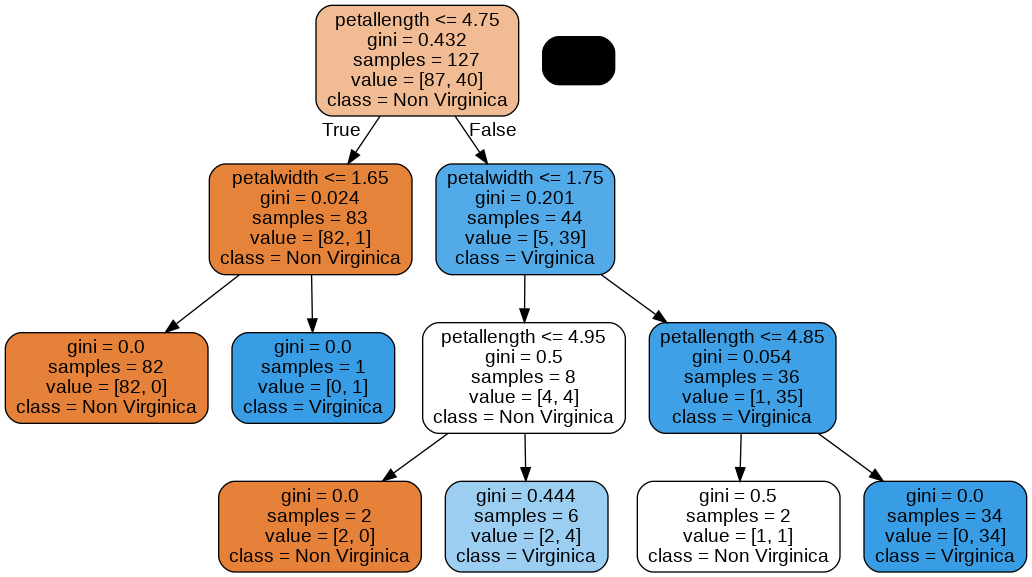

In [64]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
feature_names=X.columns,
class_names=['Non Virginica', "Virginica"])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [65]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_split=20) 
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

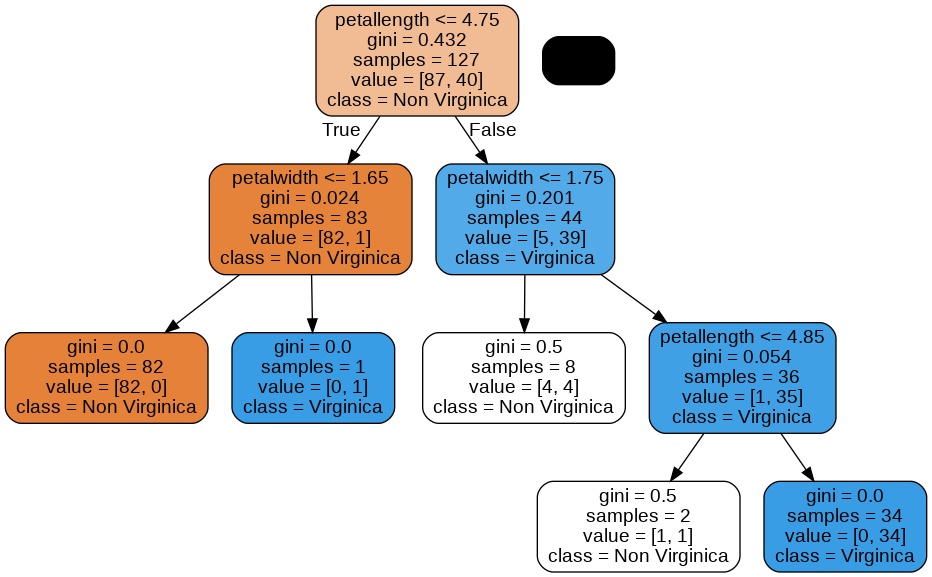

In [66]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
feature_names=X.columns,
class_names=['Non Virginica', "Virginica"])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [67]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import linear_model
from sklearn import model_selection
from sklearn import feature_selection # required for RFE
from sklearn import preprocessing
from sklearn import metrics
warnings.filterwarnings('ignore')

In [68]:
def printmetrics(actual,predicted):
    print('AUC : ',np.round(metrics.roc_auc_score(actual,predicted),4))
    print('Accuracy :',np.round(metrics.accuracy_score(actual,predicted),4))
    print('Precision : ',np.round(metrics.precision_score(actual,predicted),4))
    print('Recall : ',np.round(metrics.recall_score(actual,predicted),4))
    print('F1 : ',np.round(metrics.f1_score(actual,predicted),4))

In [69]:
df=pd.read_csv('data/loan_data_set.csv')
df=df.drop('Loan_ID',axis=1)
df=df.dropna()

In [70]:
newcols=['gender','married','dependents','edu','selfemp','appinc','coappinc','amnt','term','chistory','proparea','status']
df.columns=newcols
df['status']=df['status'].replace({'Y':1,'N':0})
X=df.drop('status',axis=1)
y=df['status']

In [71]:
catcols=list(X.select_dtypes(include='object').columns)

In [72]:
catcols

['gender', 'married', 'dependents', 'edu', 'selfemp', 'proparea']

In [73]:
X[:5]

,gender,married,dependents,edu,selfemp,appinc,coappinc,amnt,term,chistory,proparea
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


# for tree based algorithms OHE is not Mandatory

In [74]:
X['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [75]:
X['gender']=X['gender'].replace({'Male':1,'Female':0})

In [76]:
X['married']=X['married'].replace({'Yes':1,'No':0})

In [77]:
X['dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [78]:
X['dependents']=X['dependents'].replace({'3+':3})

In [79]:
X['dependents']=X['dependents'].astype(np.int)

In [80]:
X['edu'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [81]:
X['edu']=X['edu'].replace({'Graduate':1,'Not Graduate':2})

In [82]:
X['selfemp'].unique()

array(['No', 'Yes'], dtype=object)

In [83]:
X['selfemp']=X['selfemp'].replace({'Yes':1,'No':0})

In [84]:
X['proparea'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [85]:
X['proparea']=X['proparea'].replace({'Rural':1,'Urban':2,'Semiurban':3})

In [86]:
X[:5]

,gender,married,dependents,edu,selfemp,appinc,coappinc,amnt,term,chistory,proparea
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,2,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [87]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=42)

In [88]:
model=tree.DecisionTreeClassifier(random_state=42) # buliding a unconstrained tree
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)


In [89]:
print('TRAINING METRICS')
print('----------------')
printmetrics(ytrain,predtrain)
print('TEST METRICS')
print('----------------')
printmetrics(ytest,predtest)



TRAINING METRICS
----------------
AUC :  1.0
Accuracy : 1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0
TEST METRICS
----------------
AUC :  0.6919
Accuracy : 0.7222
Precision :  0.8298
Recall :  0.7647
F1 :  0.7959


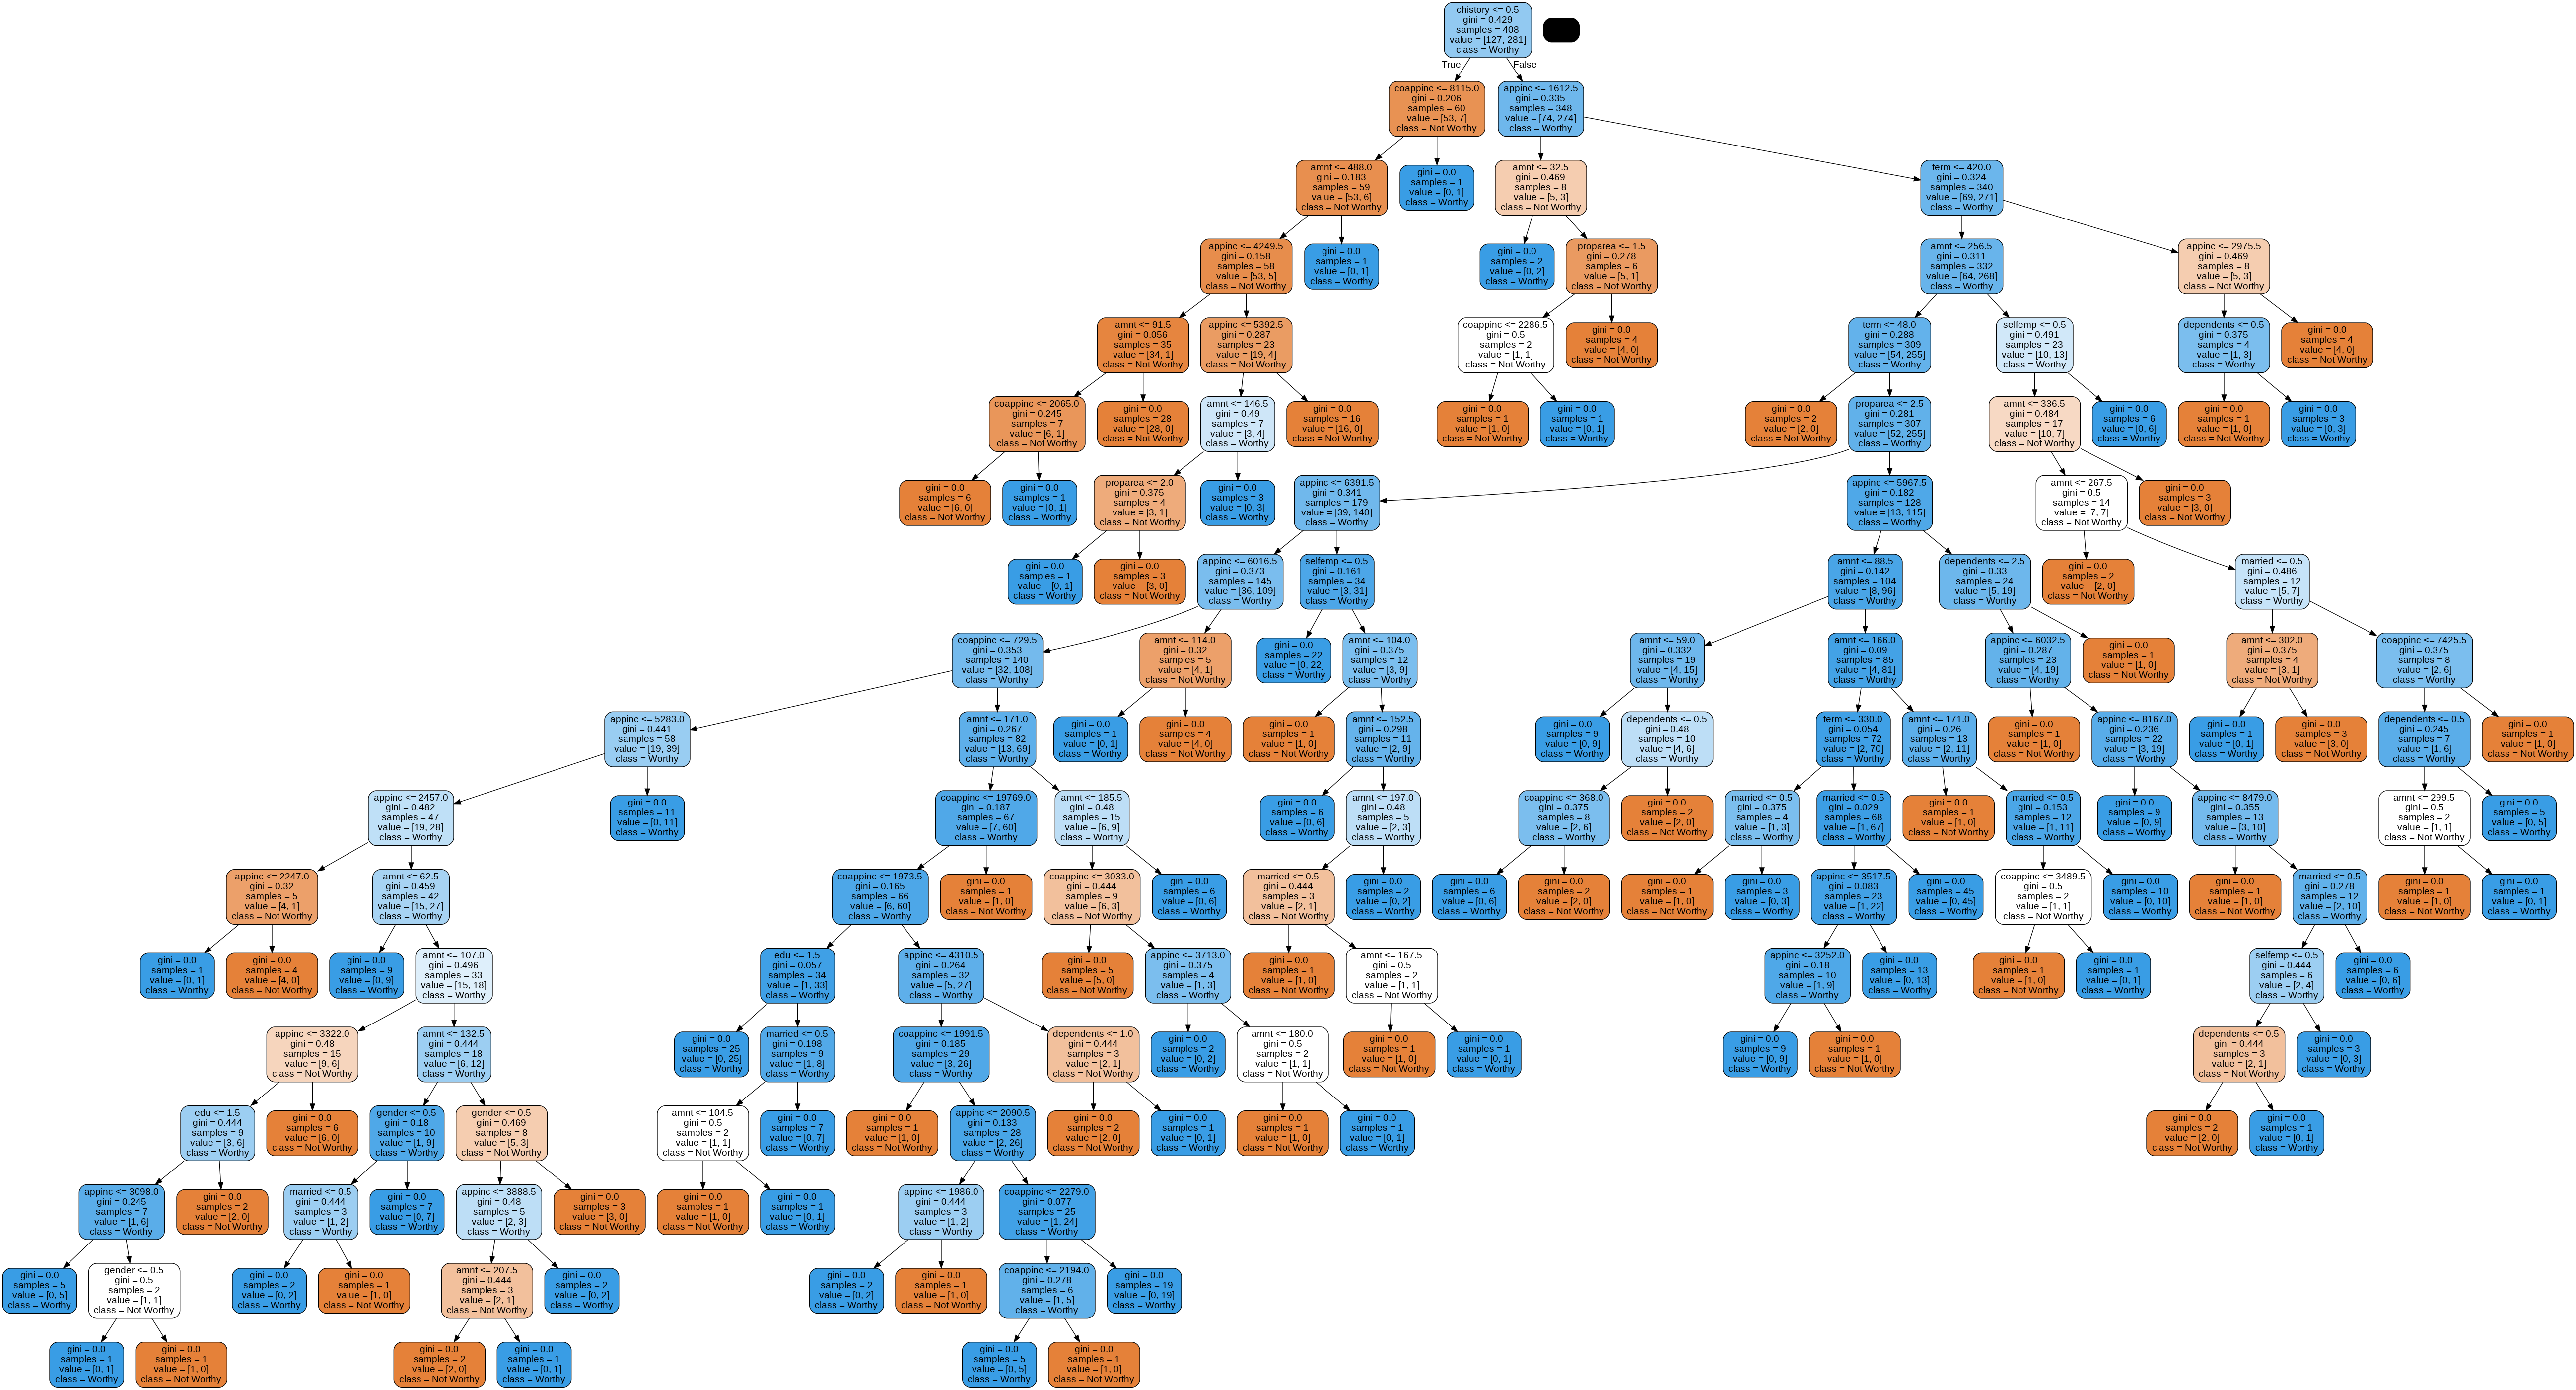

In [90]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
feature_names=X.columns,
class_names=['Not Worthy', "Worthy"])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## tree based algorithms can rank columns according to their importance

In [91]:
model.feature_importances_

array([0.0161011 , 0.03907321, 0.04566762, 0.01400003, 0.0307139 ,
       0.19717282, 0.11302586, 0.22238021, 0.0347496 , 0.26318654,
       0.02392911])

In [93]:
pd.Series(model.feature_importances_,index=Xtrain.columns).sort_values(ascending=False)

chistory      0.263187
amnt          0.222380
appinc        0.197173
coappinc      0.113026
dependents    0.045668
married       0.039073
term          0.034750
selfemp       0.030714
proparea      0.023929
gender        0.016101
edu           0.014000
dtype: float64

In [94]:
## constraining the tree

In [95]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=6) # buliding a unconstrained tree
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print('TRAINING METRICS')
print('----------------')
printmetrics(ytrain,predtrain)
print('    ')
print('TEST METRICS')
print('----------------')
printmetrics(ytest,predtest)


TRAINING METRICS
----------------
AUC :  0.781
Accuracy : 0.8529
Precision :  0.84
Recall :  0.9715
F1 :  0.901
    
TEST METRICS
----------------
AUC :  0.7129
Accuracy : 0.7917
Precision :  0.8214
Recall :  0.902
F1 :  0.8598


In [96]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_split=20,min_samples_leaf=10) # buliding a unconstrained tree
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print('TRAINING METRICS')
print('----------------')
printmetrics(ytrain,predtrain)
print('    ')
print('TEST METRICS')
print('----------------')
printmetrics(ytest,predtest)


TRAINING METRICS
----------------
AUC :  0.7594
Accuracy : 0.8113
Precision :  0.84
Recall :  0.8968
F1 :  0.8675
    
TEST METRICS
----------------
AUC :  0.7115
Accuracy : 0.75
Precision :  0.8367
Recall :  0.8039
F1 :  0.82


# Cross Validation : another technique for testing

In [97]:
Xtrain.shape

(408, 11)

In [98]:
model=tree.DecisionTreeClassifier(random_state=42) # model object created but not fitted 
recallarr=model_selection.cross_val_score(estimator=model,X=Xtrain,y=ytrain,cv=5,scoring='recall')

In [99]:
recallarr

array([0.80701754, 0.80357143, 0.78571429, 0.83928571, 0.85714286])

In [100]:
recallarr.mean()

0.8185463659147869

In [101]:
recallarr.std()

0.025903349909530506

In [102]:
model=tree.DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print('TRAINING METRICS')
print('----------------')
printmetrics(ytrain,predtrain)
print('    ')
print('TEST METRICS')
print('----------------')
printmetrics(ytest,predtest)



TRAINING METRICS
----------------
AUC :  1.0
Accuracy : 1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0
    
TEST METRICS
----------------
AUC :  0.6919
Accuracy : 0.7222
Precision :  0.8298
Recall :  0.7647
F1 :  0.7959


## SD is small enough , DecTree is working consistently with the data
## mean recall : .8185 (which is good)

In [103]:
model=tree.DecisionTreeClassifier(random_state=42) # model object created but not fitted 
aucarr=model_selection.cross_val_score(estimator=model,X=Xtrain,y=ytrain,cv=5,scoring='roc_auc')

In [104]:
aucarr.mean()

0.6806577983420089

In [105]:
aucarr.std()

0.05950790658806561

## std is not small!!!

## Hyperparameter Tuning:Grid Search CV(class)

In [107]:
model=tree.DecisionTreeClassifier(random_state=42)
pdict={'max_depth':[5,6,7,8,9,10]} # a dictionary , key ->hyperparameter name , value-> list
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,cv=5,scoring='roc_auc',n_jobs=-1)

### n_jobs=-1 --> use all available CPU

In [108]:
gridobj.fit(Xtrain,ytrain) # this is computationaly very expensive !!!!

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10]}, scoring='roc_auc')

In [109]:
gridobj.best_score_ # best recall

0.6731280605359553

In [110]:
gridobj.best_params_

{'max_depth': 9}

In [111]:
bestmodel=gridobj.best_estimator_

In [112]:
bestmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [113]:
trainpred=bestmodel.predict(Xtrain)
testpred=bestmodel.predict(Xtest)

In [114]:
printmetrics(ytrain,trainpred)

AUC :  0.8189
Accuracy : 0.8873
Precision :  0.8593
Recall :  1.0
F1 :  0.9243


In [115]:
printmetrics(ytest,testpred)

AUC :  0.7087
Accuracy : 0.8056
Precision :  0.8136
Recall :  0.9412
F1 :  0.8727


In [116]:
model=tree.DecisionTreeClassifier(random_state=42)
pdict={'min_samples_split':[75,80,90,100] , 'min_samples_leaf':[35,40,45,50]} # a dictionary , key ->hyperparameter name , value-> list
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1,return_train_score=True)

In [117]:
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [35, 40, 45, 50],
                         'min_samples_split': [75, 80, 90, 100]},
             return_train_score=True, scoring='recall')

In [118]:
cvresults=pd.DataFrame(gridobj.cv_results_)

In [119]:
list(cvresults.columns)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [120]:
cvresults[ ['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'min_samples_leaf': 35, 'min_samples_split': 75}",0.975083,0.975000
1,"{'min_samples_leaf': 35, 'min_samples_split': 80}",0.975083,0.975000
2,"{'min_samples_leaf': 35, 'min_samples_split': 90}",0.975083,0.975000
3,"{'min_samples_leaf': 35, 'min_samples_split': ...",0.975083,0.975000
4,"{'min_samples_leaf': 40, 'min_samples_split': 75}",0.975083,0.975000
5,"{'min_samples_leaf': 40, 'min_samples_split': 80}",0.975083,0.975000
6,"{'min_samples_leaf': 40, 'min_samples_split': 90}",0.975083,0.975000
7,"{'min_samples_leaf': 40, 'min_samples_split': ...",0.975083,0.975000
8,"{'min_samples_leaf': 45, 'min_samples_split': 75}",0.978639,0.985714
9,"{'min_samples_leaf': 45, 'min_samples_split': 80}",0.978639,0.985714


In [121]:
gridobj.best_params_

{'min_samples_leaf': 50, 'min_samples_split': 75}

In [122]:
bestmodel=gridobj.best_estimator_

In [123]:
trainpred=bestmodel.predict(Xtrain)
testpred=bestmodel.predict(Xtest)

In [124]:
printmetrics(ytrain,trainpred)

AUC :  0.6962
Accuracy : 0.8015
Precision :  0.7874
Recall :  0.9751
F1 :  0.8712


In [125]:
printmetrics(ytest,testpred)

AUC :  0.7381
Accuracy : 0.8472
Precision :  0.8226
Recall :  1.0
F1 :  0.9027


In [126]:
gridobj.best_params_

{'min_samples_leaf': 50, 'min_samples_split': 75}

# Recursive Feature Elemination(RFE) : feature selection technique

In [127]:
list(Xtrain.columns)

['gender',
 'married',
 'dependents',
 'edu',
 'selfemp',
 'appinc',
 'coappinc',
 'amnt',
 'term',
 'chistory',
 'proparea']

In [128]:
from sklearn import feature_selection

In [129]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=50,min_samples_split=75)

In [130]:
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=5)
# feature selection using decision tree

In [131]:
rfeobj.fit(Xtrain,ytrain)

RFE(estimator=DecisionTreeClassifier(min_samples_leaf=50, min_samples_split=75,
                                     random_state=42),
    n_features_to_select=5)

In [132]:
rfeobj.support_ # boolean array

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True])

In [133]:
Xtrain.columns[rfeobj.support_]

Index(['coappinc', 'amnt', 'term', 'chistory', 'proparea'], dtype='object')

In [134]:
selected=list(Xtrain.columns[rfeobj.support_])

In [135]:
Xtrain1=Xtrain[ list(Xtrain.columns[rfeobj.support_]) ]

Xtest1=Xtest[list(Xtrain.columns[rfeobj.support_])]

In [136]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=50,min_samples_split=75)

model.fit(Xtrain1,ytrain)

trainpred=model.predict(Xtrain1)
testpred=model.predict(Xtest1)

In [137]:
printmetrics(ytrain,trainpred)


AUC :  0.6962
Accuracy : 0.8015
Precision :  0.7874
Recall :  0.9751
F1 :  0.8712


In [138]:
printmetrics(ytest,testpred)

AUC :  0.7381
Accuracy : 0.8472
Precision :  0.8226
Recall :  1.0
F1 :  0.9027


In [139]:
model=tree.DecisionTreeClassifier(random_state=42)
rfemodel=feature_selection.RFE(estimator=model) # n_features_to_select : best value to find using GridSearchCV
pdict={'n_features_to_select':[1,2,3,4,5,6]} # a dictionary , key ->hyperparameter name , value-> list
gridobj=model_selection.GridSearchCV(estimator=rfemodel,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1,return_train_score=True)

In [140]:
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RFE(estimator=DecisionTreeClassifier(random_state=42)),
             n_jobs=-1, param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6]},
             return_train_score=True, scoring='recall')

In [141]:
gridobj.best_params_

{'n_features_to_select': 4}

In [142]:
bestmodel=gridobj.best_estimator_ # here we get a rfe model as gridsearchcv is based on rfe

In [143]:
Xtrain.columns[bestmodel.support_]

Index(['appinc', 'coappinc', 'amnt', 'chistory'], dtype='object')

In [144]:
Xtrain1=Xtrain[ list(Xtrain.columns[bestmodel.support_]) ]
Xtest1=Xtest[list(Xtrain.columns[bestmodel.support_])]

In [145]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=50,min_samples_split=75)
model.fit(Xtrain1,ytrain)
trainpred=model.predict(Xtrain1)
testpred=model.predict(Xtest1)

In [146]:
printmetrics(ytrain,trainpred)

AUC :  0.6962
Accuracy : 0.8015
Precision :  0.7874
Recall :  0.9751
F1 :  0.8712


In [147]:
printmetrics(ytest,testpred)

AUC :  0.7381
Accuracy : 0.8472
Precision :  0.8226
Recall :  1.0
F1 :  0.9027


In [148]:
cvresults=pd.DataFrame(gridobj.cv_results_)

In [149]:
cvresults[ ['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'n_features_to_select': 1},0.945722,0.672494
1,{'n_features_to_select': 2},0.991984,0.746867
2,{'n_features_to_select': 3},1.000000,0.754323
3,{'n_features_to_select': 4},1.000000,0.765163
4,{'n_features_to_select': 5},1.000000,0.754511
5,{'n_features_to_select': 6},1.000000,0.750940
